In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
#Read csv
file_path = '/Users/Hiro/Desktop/Skill_Development/20250314 Data Science Institute/Repos/Pharma_Spending_Pattern/Cleaned_data_with_population.csv'
df = pd.read_csv(file_path)
print(df.shape)

(377, 7)


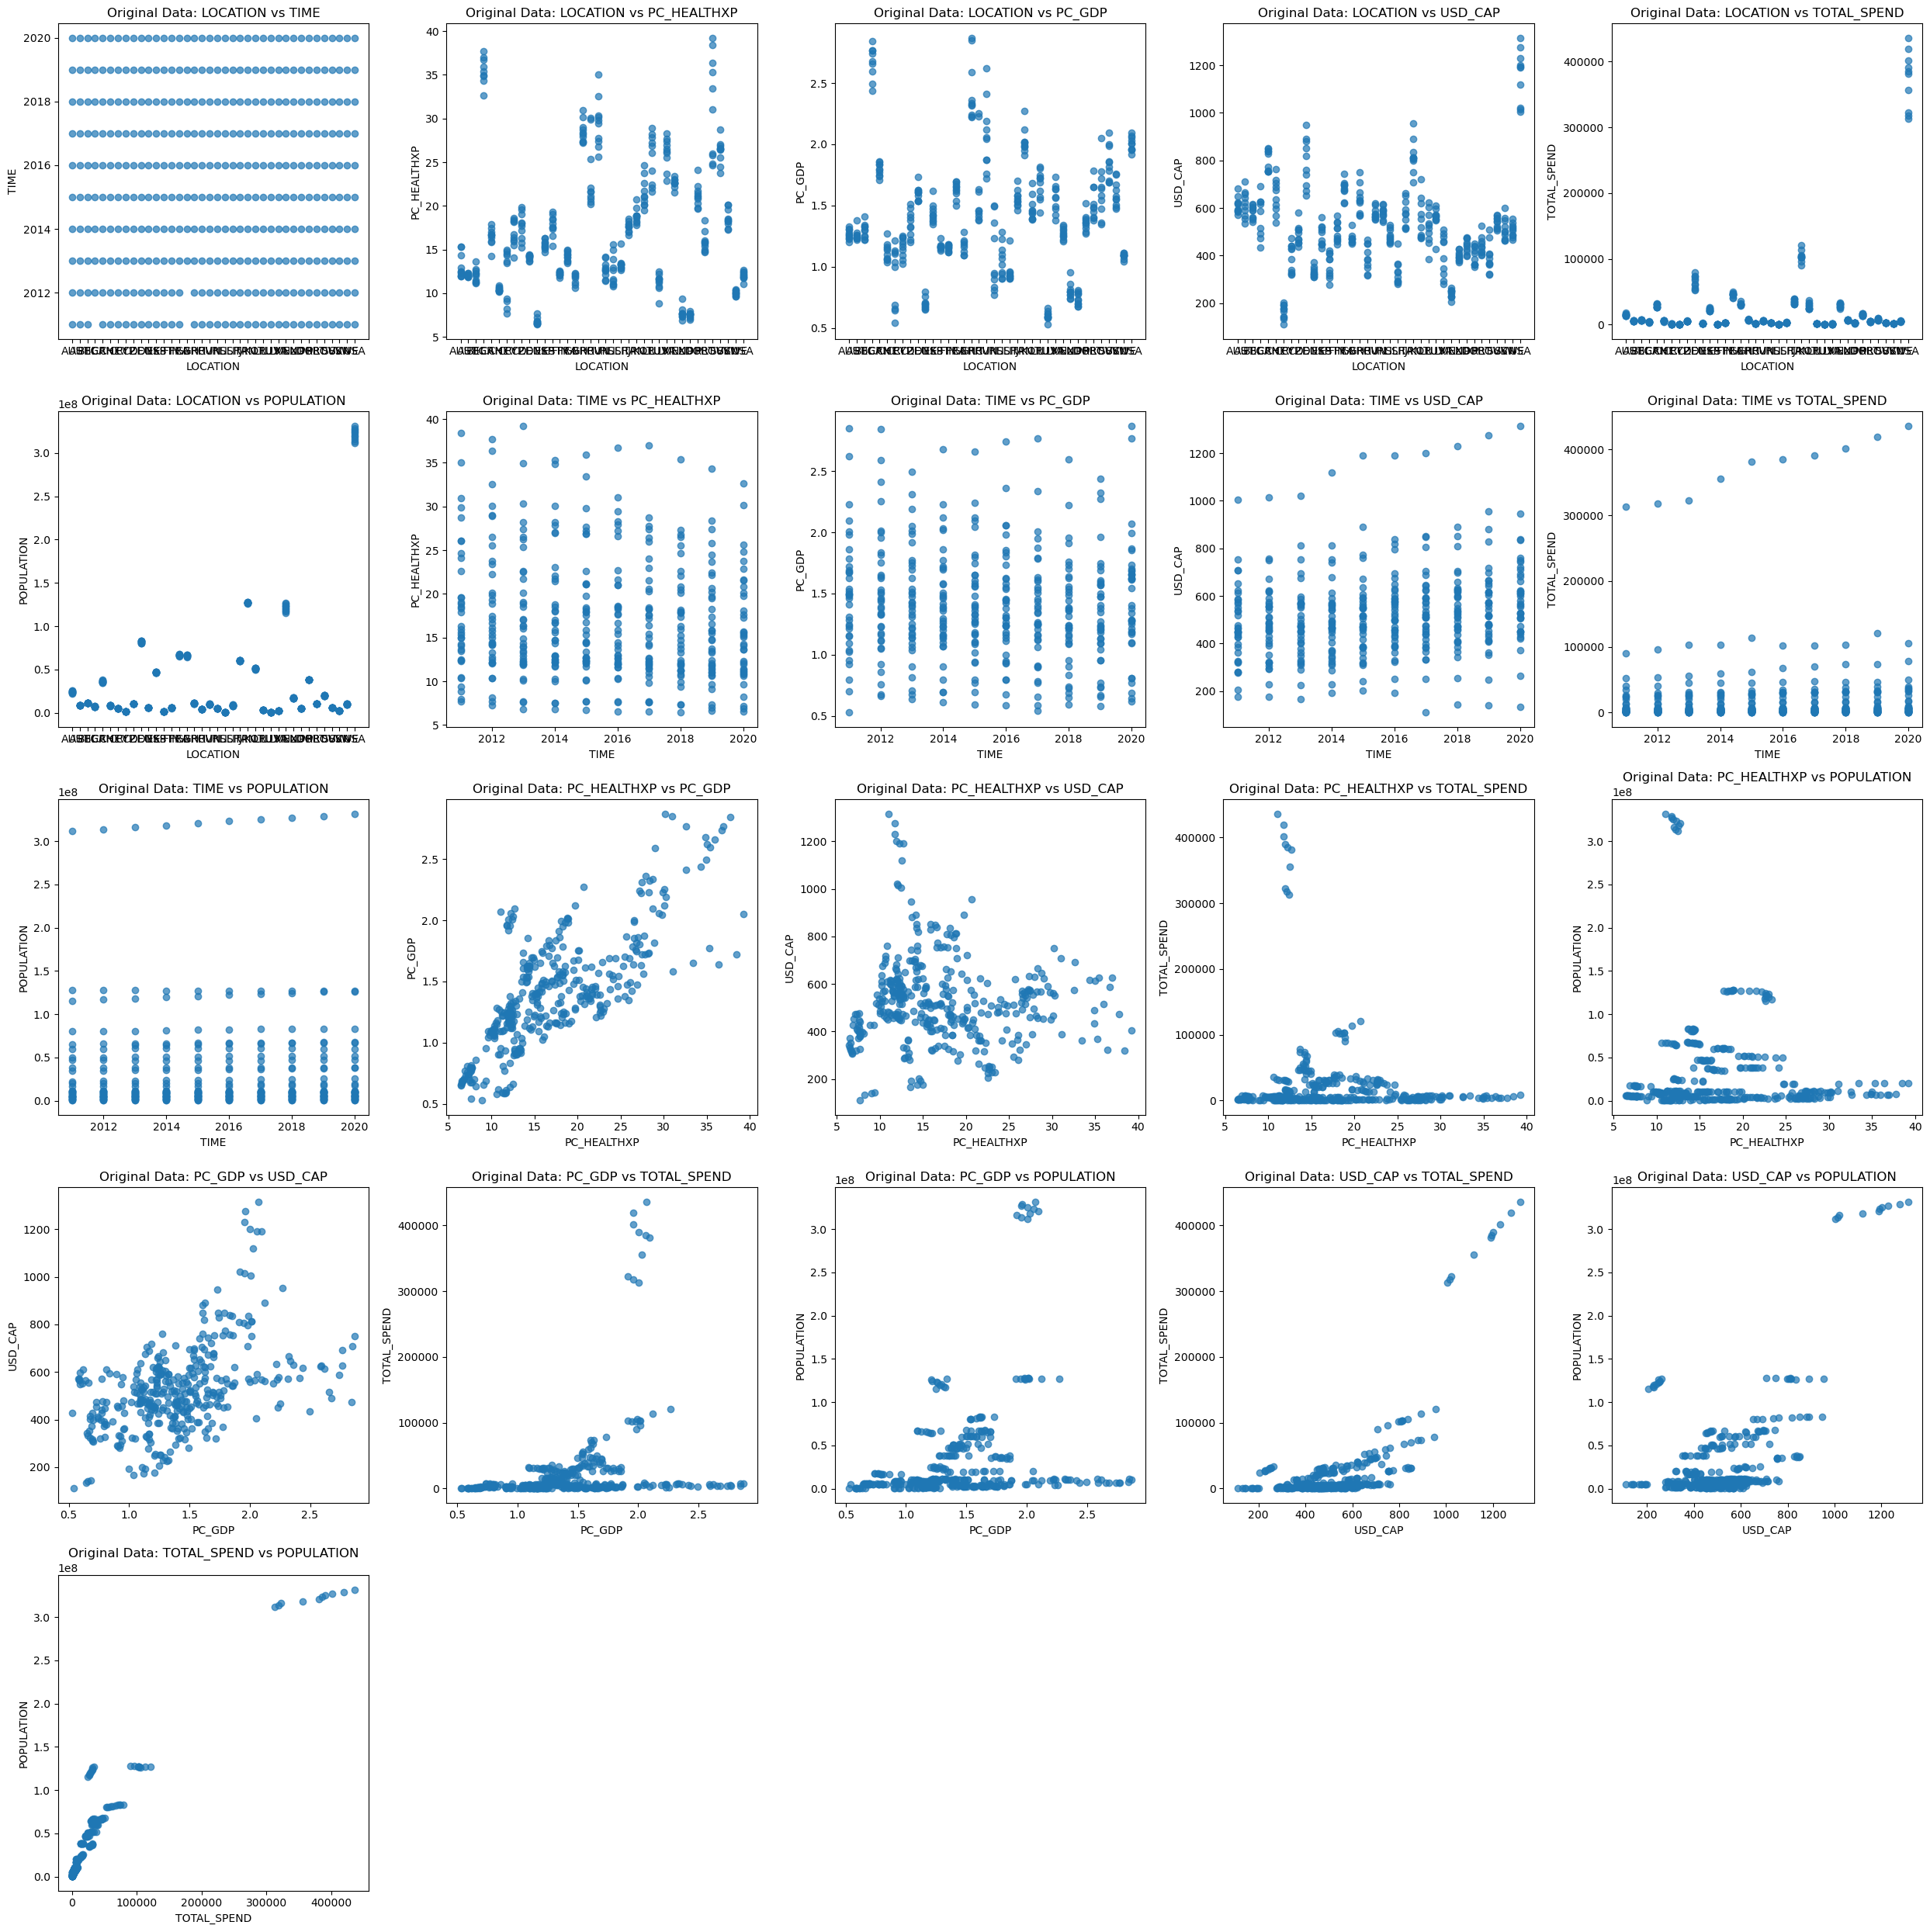

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    num_features = len(feature_names)
    num_plots = num_features * (num_features - 1) // 2

    # Choose grid size
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    plt.figure(figsize=(5 * num_cols, 5 * num_rows))

    plot_number = 1

    for i in range(num_features):
        for j in range(i + 1, num_features):
            plt.subplot(num_rows, num_cols, plot_number)

            if color_labels is not None:
                plt.scatter(
                    data[feature_names[i]],
                    data[feature_names[j]],
                    c=color_labels,
                    cmap='viridis',
                    alpha=0.7
                )
            else:
                plt.scatter(
                    data[feature_names[i]],
                    data[feature_names[j]],
                    alpha=0.7
                )

            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')

            plot_number += 1

    plt.tight_layout()
    plt.show()

# Example usage
feature_names = df.columns
plot_feature_pairs(df, feature_names, title_prefix='Original Data: ')


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

print("Numeric columns:", numeric_cols)
print("Categorical columns", categorical_cols)

Numeric columns: Index(['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND',
       'POPULATION'],
      dtype='object')
Categorical columns Index(['LOCATION'], dtype='object')


In [17]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[numeric_cols])

scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

In [19]:
df[categorical_cols] = df[categorical_cols].fillna('Missing')

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_categorical= encoder.fit_transform(df[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)

encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_col_names)

In [25]:
#Reset index to ensure alignment
final_df = pd.concat([scaled_numeric_df.reset_index(drop=True),
                      encoded_categorical_df.reset_index(drop=True)],
                      axis=1)

print(final_df.head())

       TIME  PC_HEALTHXP    PC_GDP   USD_CAP  TOTAL_SPEND  POPULATION  \
0 -1.585502    -0.261391 -0.220073  0.320666    -0.163169   -0.167493   
1 -1.235745    -0.261814 -0.174693  0.357854    -0.156953   -0.160632   
2 -0.885988    -0.397641 -0.332442  0.338132    -0.154524   -0.153750   
3 -0.536232    -0.658152 -0.388627  0.245054    -0.157670   -0.147690   
4 -0.186475    -0.666050 -0.306511  0.381142    -0.144959   -0.141755   

   LOCATION_AUT  LOCATION_BEL  LOCATION_BGR  LOCATION_CAN  ...  LOCATION_MEX  \
0           0.0           0.0           0.0           0.0  ...           0.0   
1           0.0           0.0           0.0           0.0  ...           0.0   
2           0.0           0.0           0.0           0.0  ...           0.0   
3           0.0           0.0           0.0           0.0  ...           0.0   
4           0.0           0.0           0.0           0.0  ...           0.0   

   LOCATION_NLD  LOCATION_NOR  LOCATION_POL  LOCATION_PRT  LOCATION_ROU  \
0    

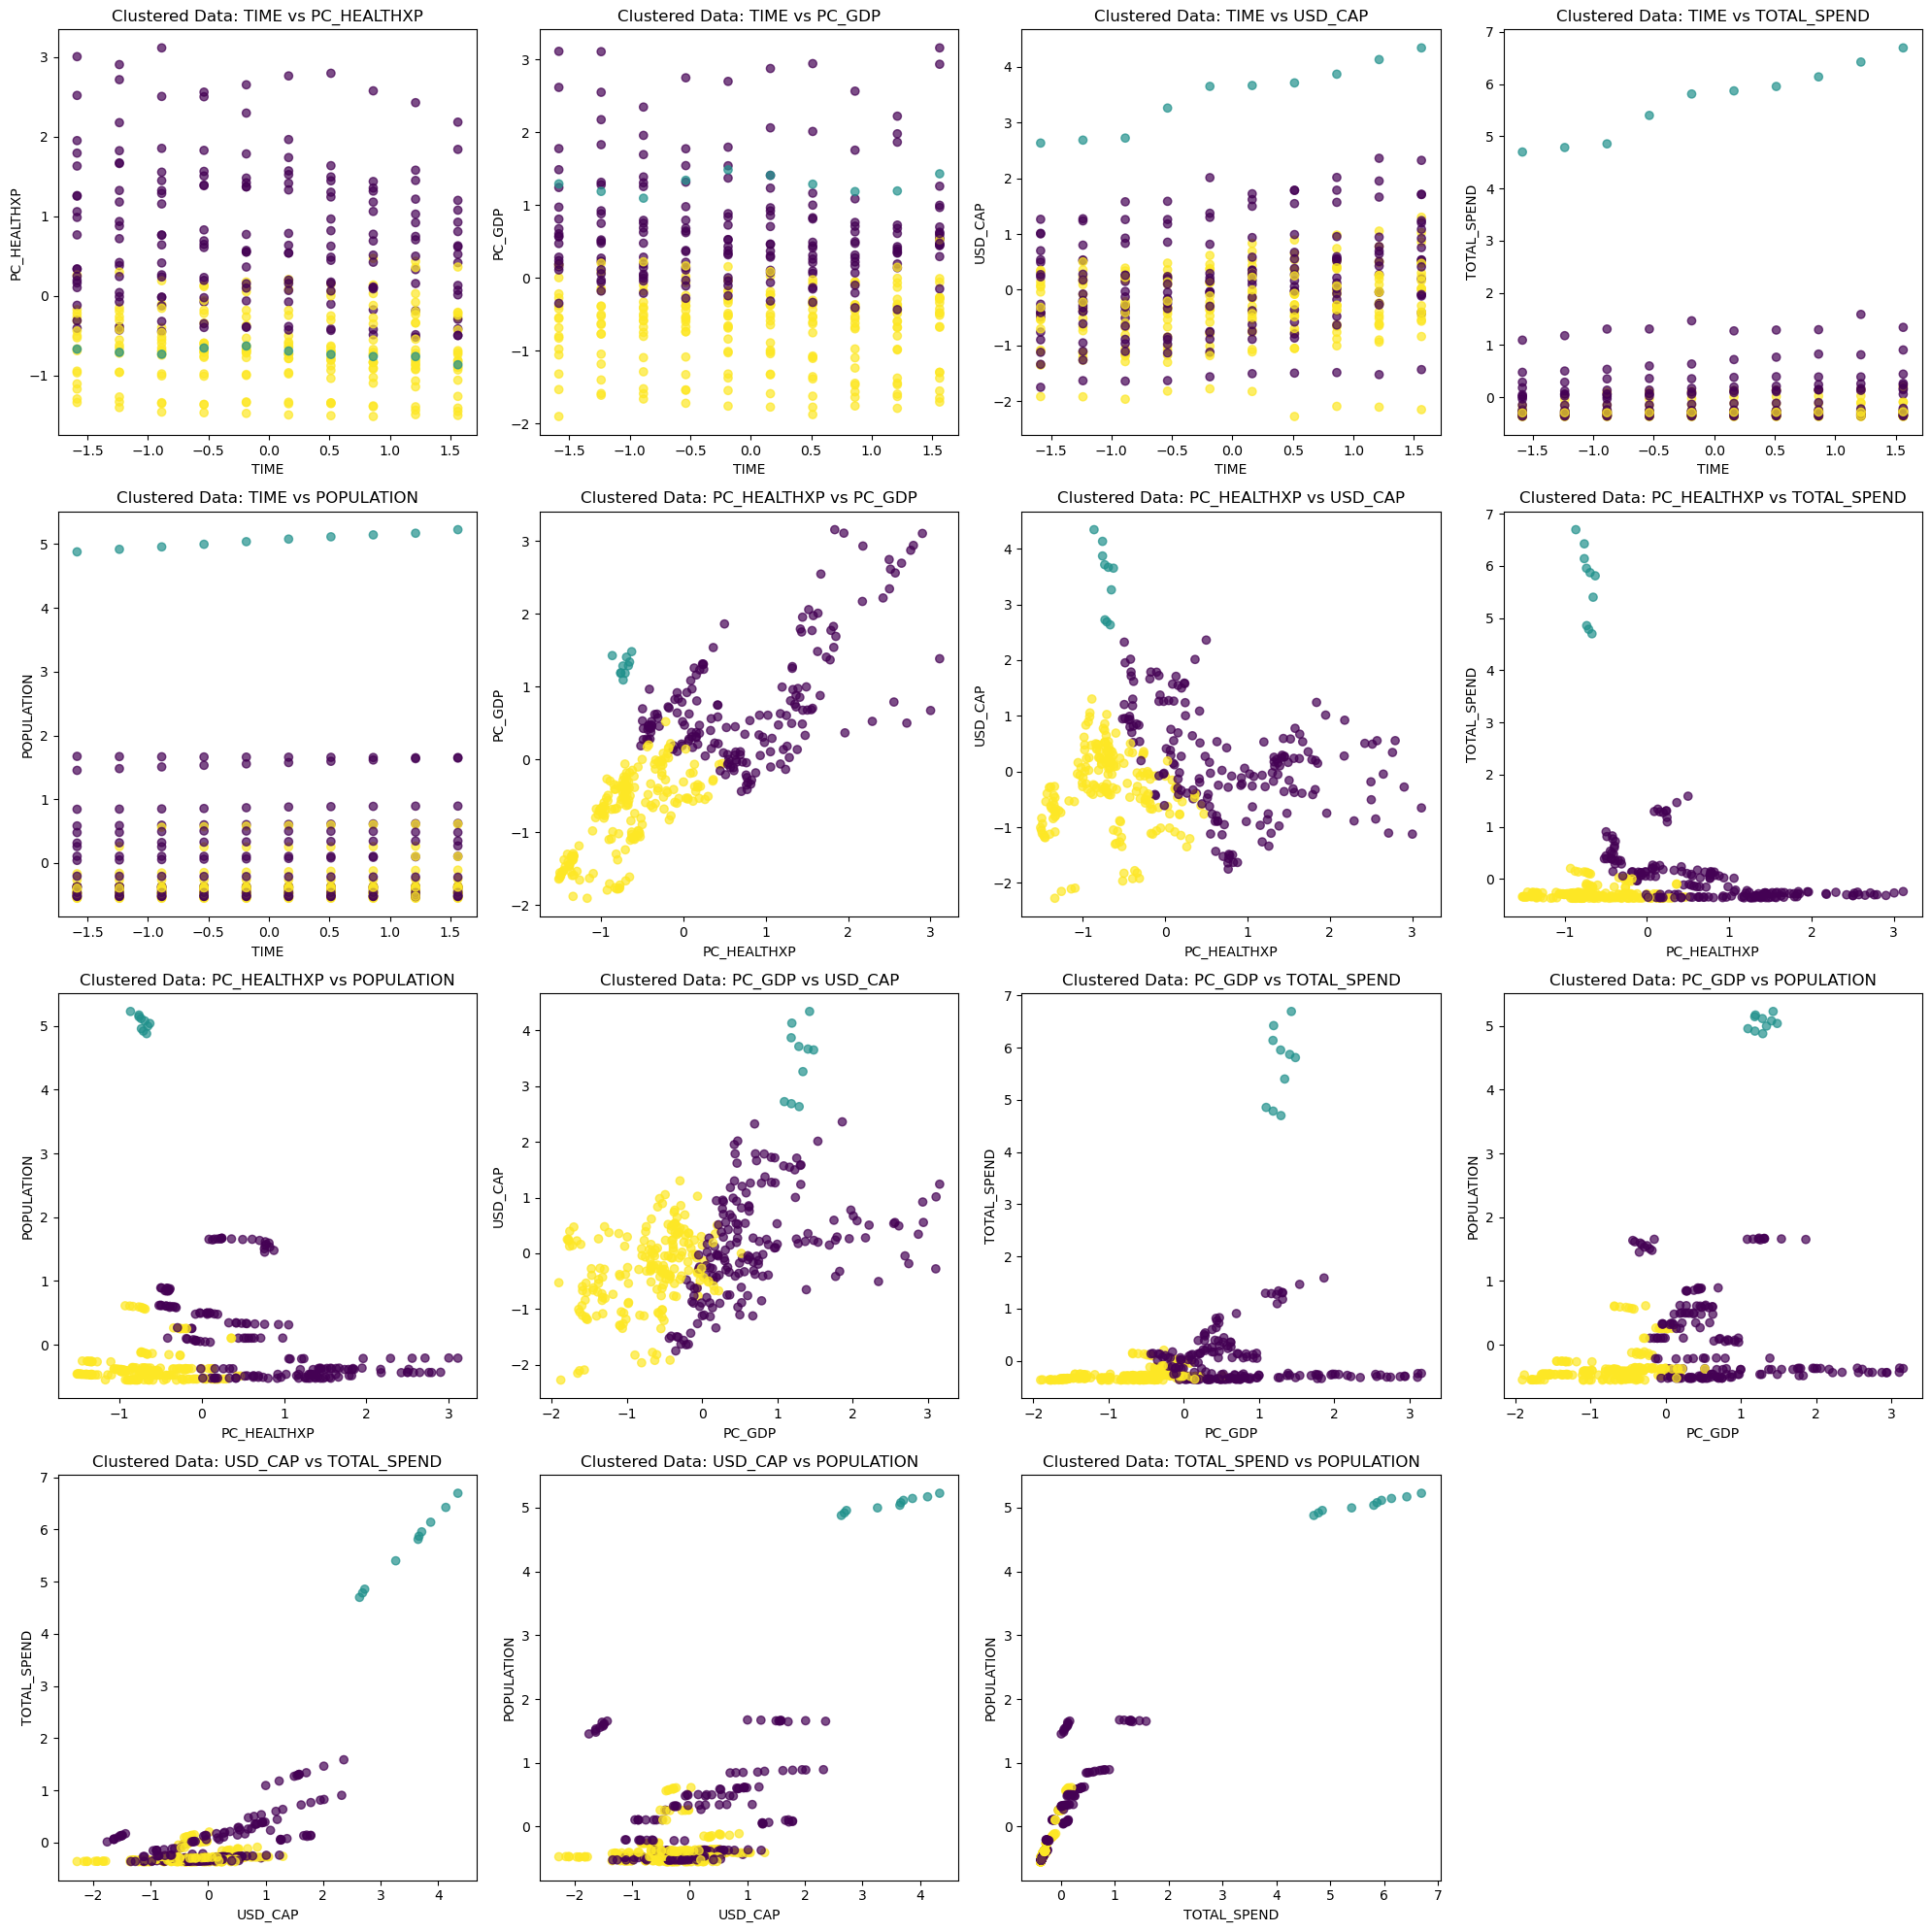

In [30]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(final_df)
clustered_final_df = final_df.copy()
clustered_final_df['Cluster'] = kmeans.labels_

plot_feature_pairs(
    clustered_final_df, 
    feature_names=numeric_cols, 
    color_labels=clustered_final_df['Cluster'], 
    title_prefix='Clustered Data: '
)